In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, log_loss
import random

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
font = {'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)

### Glance at raw data

In [2]:
!pwd

/Users/chun/Galvanize/capstones/capstone2/OnlineNewsPopularity/notebooks


In [3]:
data = pd.read_csv('../data/OnlineNewsPopularity.csv')

In [4]:
data.shape

(39644, 61)

In [5]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [17]:
data.iloc[:,12:20]

,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min
0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
39639,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0
39640,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0
39641,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
39642,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0


In [23]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [27]:
data[' data_channel_is_lifestyle'].value_counts()

0.0    37545
1.0     2099
Name:  data_channel_is_lifestyle, dtype: int64

In [30]:
data = data.rename(columns = lambda x: x.strip())

In [32]:
data['data_channel_is_lifestyle'].value_counts()

0.0    37545
1.0     2099
Name: data_channel_is_lifestyle, dtype: int64

<AxesSubplot:>

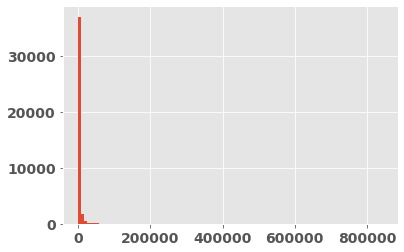

In [38]:
data['shares'].hist(bins=100)

In [37]:
data['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [40]:
train, test = train_test_split(data, test_size=0.2)

In [42]:
train.shape

(31715, 61)

<AxesSubplot:>

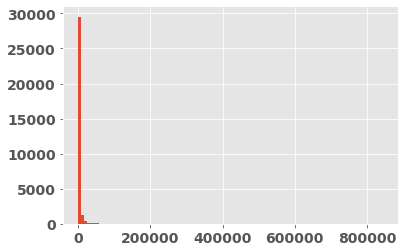

In [43]:
train['shares'].hist(bins=100)

<AxesSubplot:>

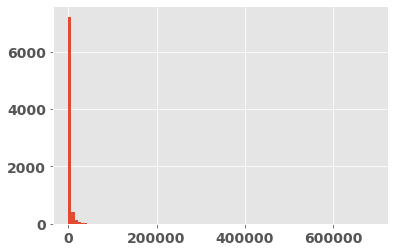

In [44]:
test['shares'].hist(bins=100)

In [45]:
test.shape

(7929, 61)

In [46]:
train.to_csv(r'../data/train.csv',header=True)

In [47]:
test.to_csv(r'../data/test.csv',header=True)

### EDA on train dataset

In [3]:
df = pd.read_csv('../data/train.csv')

In [4]:
df.shape

(31715, 62)

In [5]:
df = df.iloc[:,1:]

In [6]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2014/09/03/murdered-journa...,127.0,9.0,423.0,0.541872,1.0,0.637993,15.0,3.0,2.0,...,0.062500,0.5,-0.345000,-1.000,-0.125000,0.50,0.50,0.00,0.50,3300
1,http://mashable.com/2014/11/06/whatsapp-blue-c...,61.0,12.0,0.0,0.000000,0.0,0.000000,0.0,0.0,14.0,...,0.000000,0.0,0.000000,0.000,0.000000,0.25,0.25,0.25,0.25,3400
2,http://mashable.com/2014/07/09/sigourney-weave...,182.0,15.0,654.0,0.486656,1.0,0.704735,4.0,1.0,1.0,...,0.033333,1.0,-0.372863,-1.000,-0.050000,0.30,0.20,0.20,0.20,2500
3,http://mashable.com/2014/06/04/germany-investi...,218.0,8.0,403.0,0.574307,1.0,0.784404,10.0,0.0,1.0,...,0.062500,1.0,-0.379365,-0.700,-0.155556,0.50,0.00,0.00,0.00,2100
4,http://mashable.com/2014/06/25/blast-kills-12-...,197.0,11.0,928.0,0.370000,1.0,0.466780,6.0,6.0,19.0,...,0.100000,0.5,-0.112500,-0.125,-0.100000,0.00,0.00,0.50,0.00,1300


In [7]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [56]:
token_cols = ['n_tokens_title','n_tokens_content','n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'average_token_length','shares']
link_cols = ['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos','shares']
channel_cols = ['data_channel_is_lifestyle','data_channel_is_entertainment', 'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world','shares']
kw_cols = ['kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg','shares']
ref_cols = ['self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess','shares']
weekday_cols = ['weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend','shares']
LDA_cols = ['LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04','shares']
rate_cols = ['global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words','shares']
polarity_cols = ['avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity','shares']
title_cols = ['title_subjectivity','title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity','shares']

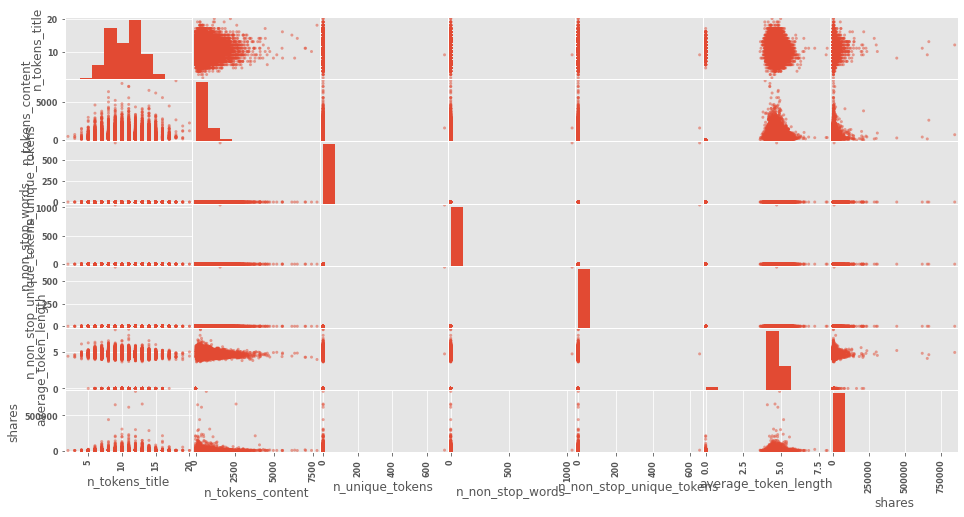

In [62]:
pd.plotting.scatter_matrix(df[token_cols], figsize=(16,8));

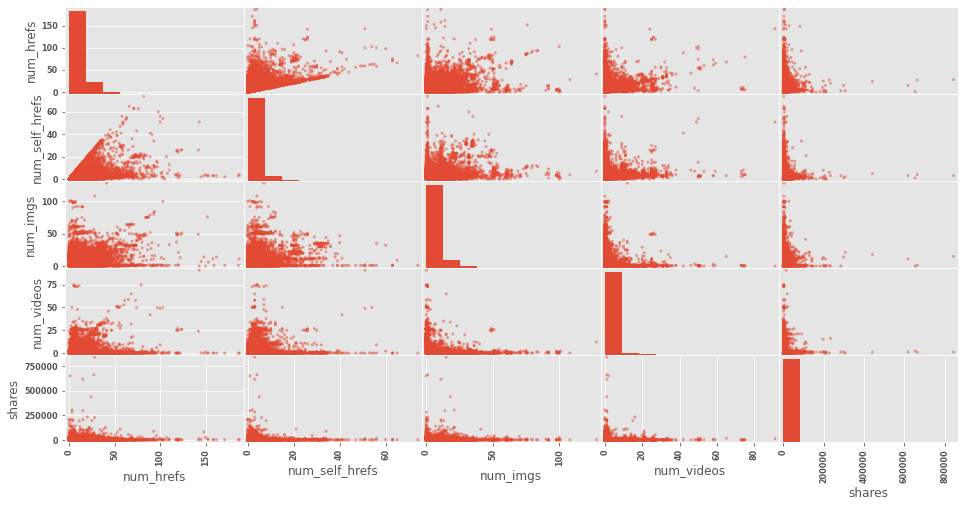

In [63]:
pd.plotting.scatter_matrix(df[link_cols], figsize=(16,8));

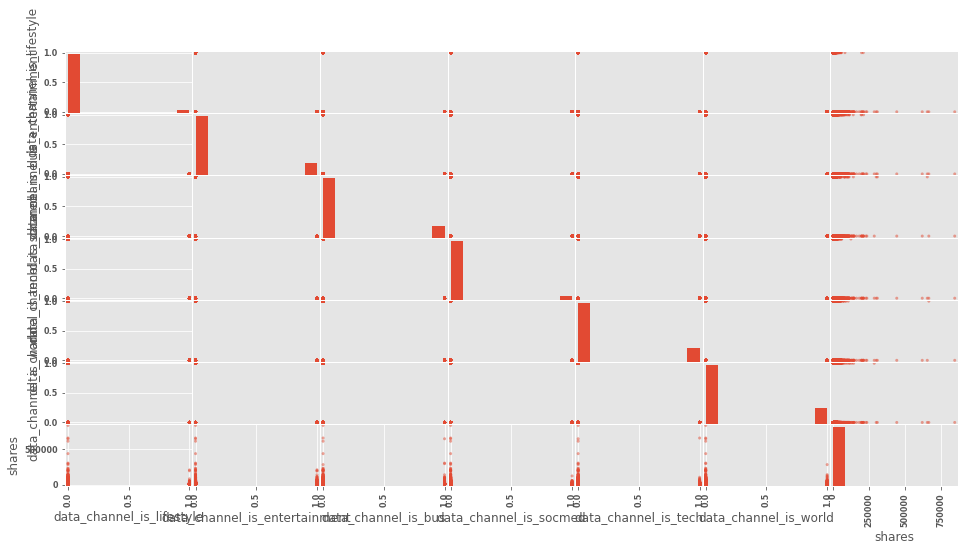

In [64]:
pd.plotting.scatter_matrix(df[channel_cols], figsize=(16,8));

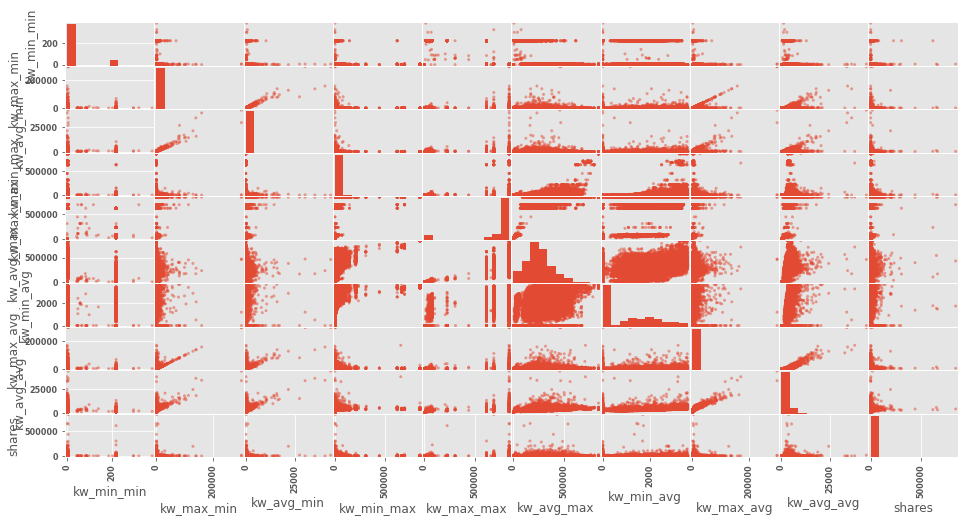

In [65]:
pd.plotting.scatter_matrix(df[kw_cols], figsize=(16,8));

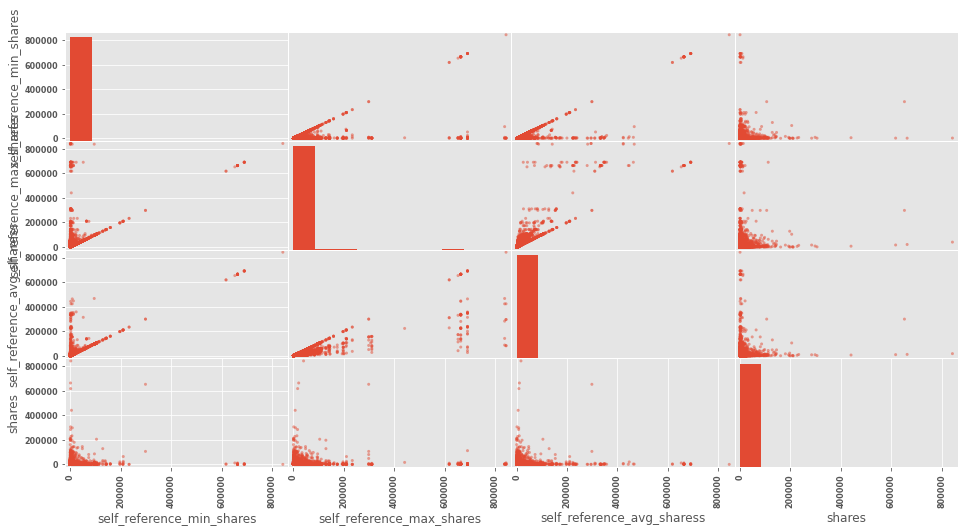

In [66]:
pd.plotting.scatter_matrix(df[ref_cols], figsize=(16,8));

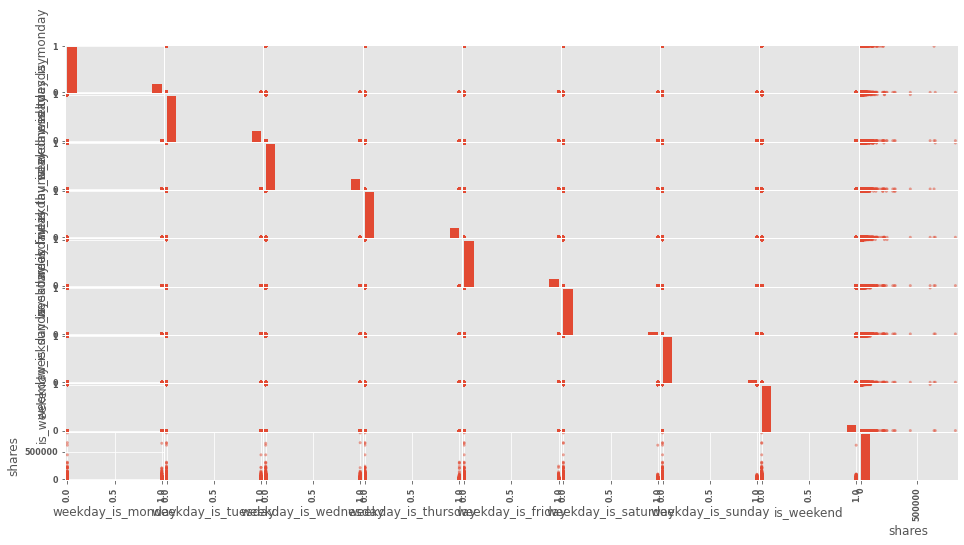

In [67]:
pd.plotting.scatter_matrix(df[weekday_cols], figsize=(16,8));

In [8]:
df['shares'].describe()

count     31715.000000
mean       3408.858868
std       11785.265035
min           1.000000
25%         944.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

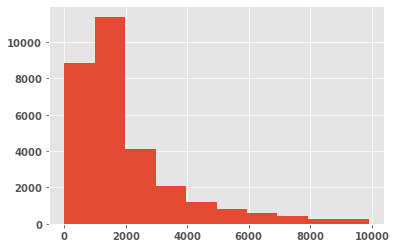

In [83]:
df[df['shares']<10000]['shares'].hist();

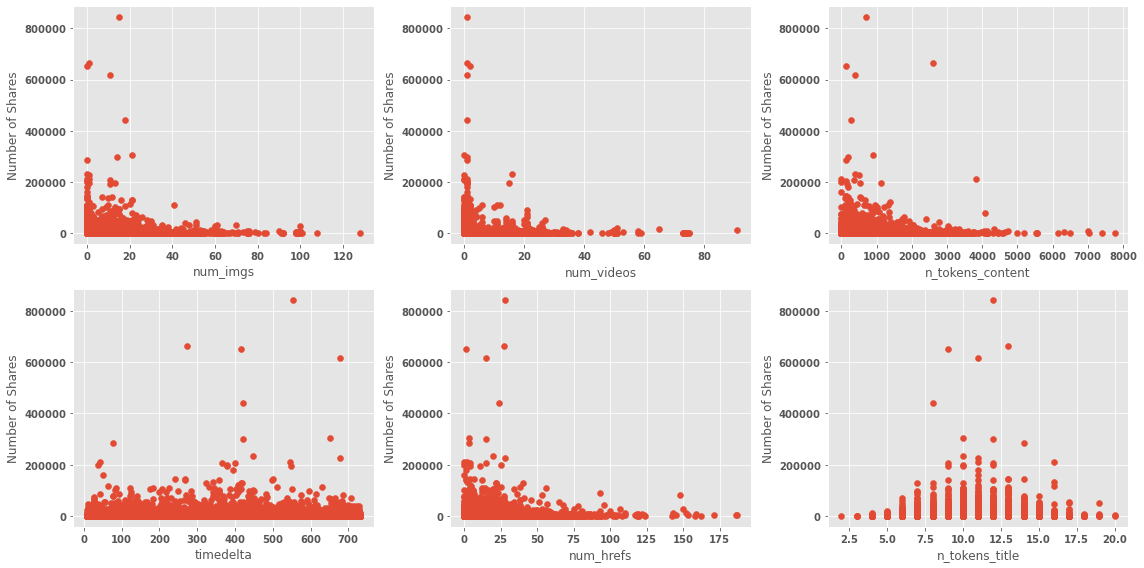

In [9]:
cols = ['num_imgs', 'num_videos', 'n_tokens_content','timedelta', 'num_hrefs', 'n_tokens_title']

fig, axs = plt.subplots(2,3,figsize=(16,8))
for i, ax in enumerate(axs.flatten()):
    ax.scatter(df[cols[i]], df['shares'])
    ax.set_xlabel(cols[i])
    ax.set_ylabel('Number of Shares')

fig.tight_layout()

In [115]:
df_features = df.drop(['shares'], axis=1)
corr = df_features.corr()

In [122]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [123]:
columns

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [129]:
corr_matrix['shares'].sort_values(ascending=False)

shares                           1.000000
kw_avg_avg                       0.109305
LDA_03                           0.083687
kw_max_avg                       0.066291
self_reference_avg_sharess       0.062113
self_reference_min_shares        0.060635
self_reference_max_shares        0.050294
num_hrefs                        0.044593
kw_avg_max                       0.044170
num_imgs                         0.041726
kw_min_avg                       0.035542
global_subjectivity              0.032574
kw_avg_min                       0.029420
kw_max_min                       0.029353
abs_title_sentiment_polarity     0.026284
num_keywords                     0.025078
num_videos                       0.022159
title_subjectivity               0.021845
is_weekend                       0.016271
weekday_is_saturday              0.014541
n_tokens_title                   0.012370
avg_positive_polarity            0.009851
title_sentiment_polarity         0.009764
kw_max_max                       0

In [131]:
df['self_reference_avg_sharess'].value_counts()

0.000000       5719
1200.000000     459
1300.000000     435
1100.000000     422
1500.000000     385
               ... 
734.000000        1
7308.500000       1
1644.000000       1
8452.500000       1
1985.428571       1
Name: self_reference_avg_sharess, Length: 7365, dtype: int64